<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Laboratorio: Cómo analizar un conjunto de datos reales con SQL y Python</font></h1>

# Introducción

Esta libreta muestra cómo almacenar un conjunto de datos en una base de datos y cómo analizar datos con SQL y Python. En este laboratorio, completará los siguientes objetivos: 
1. Comprender un conjunto de datos de indicadores socioeconómicos seleccionados de Chicago
1. Aprender cómo almacenar datos en una base de datos de Db2 en una instancia de IBM Cloud
1. Solucionar problemas de ejemplo para poner en práctica sus habilidades de SQL

## Indicadores socioeconómicos seleccionados de Chicago

La ciudad de Chicago cargó un conjunto de datos socioeconómicos en su portal. Este conjunto de datos contiene una selección de seis indicadores socioeconómicos que son importantes para la salud pública y un «índice de dificultades» para cada área comunitaria de Chicago entre los años 2008 a 2012. 

Las calificaciones del índice de dificultades varían de 1 a 100; los números más altos representan dificultades mayores. 

Se puede consultar la descripción detallada del conjunto de datos en [el sitio web de la ciudad de Chicago](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2). Para resumir, el conjunto de datos tiene las siguientes variables: 

* **Número del área comunitaria** (`ca`): se utiliza para identificar de forma exclusiva cada fila del conjunto de datos.

* **Nombre del área comunitaria** (`community_area_name`): el nombre de la región en la ciudad de Chicago. 

* **Porcentaje de densidad residencial** (`percent_of_housing_crowded`): porcentaje de viviendas que cuentan con más de una persona por habitación.

* **Porcentaje de viviendas por debajo del nivel de pobreza** (`percent_households_below_poverty`): porcentaje de viviendas que se encuentran debajo del umbral federal de pobreza.

* **Porcentaje de mayores de 16 años desempleados** (`percent_aged_16_unemployed`): porcentaje de personas mayores de 16 años que están desempleadas.

* **Porcentaje de mayores de 25 años sin título de educación secundaria** (`percent_aged_25_without_high_school_diploma`): porcentaje de personas mayores de 25 años que no tienen título de educación secundaria.

* **Porcentaje de menores de 18 años o mayores de 64 años**:Porcentaje de la población que tiene menos de 18 años o más de 64 años (`percent_aged_under_18_or_over_64`), es decir, personas dependientes.

* **Ingreso per cápita** (`per_capita_income_`): Para estimar el ingreso per cápita del área comunitaria, se divide la suma de los ingresos agregados a nivel del distrito dividida por la población total.

* **Índice de dificultades** (`hardship_index`): Esta calificación incorpora los seis indicadores socioeconómicos seleccionados.

En este laboratorio, observaremos las variables del conjunto de datos de indicadores socioeconómicos y luego realizaremos un análisis básico con Python. 


### Conéctese a la base de datos 
Primero, cargue la extensión de SQL y establezca una conexión con la base de datos. 

In [1]:
%load_ext sql

In [2]:
# Recuerde que la cadena de conexión tiene el formato siguiente:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# A continuación, ingrese la cadena de conexión para su instancia de base de datos de Db2 on Cloud
%sql ibm_db_sa://qsl97800:954gxzq-mk1xbk9z@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB

'Connected: qsl97800@BLUDB'

### Almacene el conjunto de datos en una tabla
##### En muchos casos, el conjunto de datos que se debe analizar está disponible como un archivo .CSV (valores separados por comas); quizás se pueda encontrar en Internet. Antes de analizar los datos con SQL, es necesario almacenarlos en la base de datos. 

##### Primero, importe el archivo .CSV de la fuente del conjunto de datos de Internet al DataFrame de Pandas.

##### Luego, debe crear una tabla en la base de datos de Db2 para almacenar el conjunto de datos. El comando PERSIST (Persistir) de SQL simplifica «mágicamente» el proceso de crear una tabla y escribir los datos de un DataFrame de Pandas en ella. 

In [3]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

##### Para verificar si la tabla se creó correctamente, puede realizar una consulta básica como la siguiente: 

In [4]:
%sql SELECT * FROM chicago_socioeconomic_data LIMIT 10;

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


## Problemas

### Problema 1

##### ¿Cuántas filas hay en el conjunto de datos? 

In [5]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


Haga doble clic  **aquí**  para ver la solución. 

<!-- Hint:

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Correct answer: 78

-->

### Problema 2

##### ¿Cuántas áreas comunitarias de Chicago tienen un índice de dificultades mayor de 50,0?

In [6]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


Haga doble clic  **aquí**  para ver la solución. 

<!-- Hint:

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;
Correct answer: 38
-->


### Problema 3

##### ¿Cuál es el valor máximo del índice de dificultades en este conjunto de datos? 

In [7]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


Haga doble clic  **aquí**  para ver la solución. 

<!-- Hint:

%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Correct answer: 98.0
-->


### Problema 4

##### ¿Cuál es el área comunitaria que tiene el índice de dificultades más alto? 


In [15]:
%sql select community_area_name from chicago_socioeconomic_data order by hardship_index DESC LIMIT 1

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
CHICAGO


Haga doble clic  **aquí**  para ver la solución. 

<!-- Hint:

## We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

## or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

Correct answer: 'Riverdale'
-->

### Problema 5

##### ¿Qué áreas comunitarias de Chicago tienen ingresos per cápita mayores de USD $60,000? 

In [16]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


Haga doble clic  **aquí**  para ver la solución. 

<!-- Hint:

%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Correct answer:Lake View,Lincoln Park, Near North Side, Loop
-->


### Problema 6

##### Cree un gráfico de dispersión con las variables per_capita_income_ y hardship_index. Explique la correlación que existe entre las dos variables. 

 * ibm_db_sa://qsl97800:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


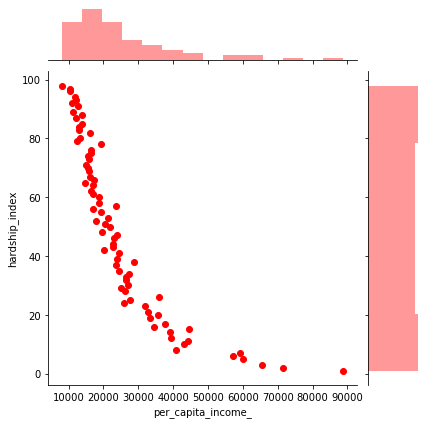

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame(),color="red")

Haga doble clic  **aquí**  para ver la solución. 

<!-- Hint:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 
-->


### Conclusión

##### Ahora que sabe cómo realizar un análisis exploratorio básico de datos con las herramientas de visualización SQL y Python, puede profundizar el análisis de este conjunto de datos para determinar cuál es la relación entre las variables `per_capita_income_`, `per_capita_income_` y `percent_aged_16_unemployed`. Intente crear visualizaciones interesantes. 

## Resumen

##### En este laboratorio, aprendió cómo almacenar un conjunto de datos reales de Internet en una base de datos (Db2 on Cloud de IBM) y cómo obtener estadísticas sobre datos con consultas SQL. Asimismo, visualizó una porción de la base de datos para comprender la historia detrás de esta información. 

Derechos de autor &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). Esta cuaderno y su código fuente se publican bajo los términos de la [Licencia de MIT](https://bigdatauniversity.com/mit-license/).
